Project Title     : Detection of Malaria from Cell Images

Group Number      : 50

Names and Registration Numbers:

Student 1         : Thashmika M.H.T.S., EG/2021/4826

Student 2       : Surasinghe R.L.D.T.H., EG/2021/4820

==================================================================================================================

**Introduction**  :

This project aims to develop a machine learning model to detect malaria from cell images with high accuracy. By analyzing microscopic images of blood samples, the system identifies malaria parasites, streamlining diagnosis and enabling early treatment. The approach leverages advanced image processing and classification techniques to improve diagnostic efficiency and support healthcare professionals in managing malaria cases.


This project addresses a Supervised-Classification problem, where the goal is to classify cell images into two categories:


  1. Parasitized (indicating the presence of malaria parasites)
  2. Uninfected (indicating no malaria parasites)

  
The dataset used provides labeled images, making it suitable for supervised learning approaches. By training on labeled examples, the model learns patterns and features that distinguish infected from uninfected cells.

===================================================================================================================

**Literature Survey :**

In recent years, machine learning has significantly contributed to medical image analysis, particularly in detecting diseases from microscopic images. Several studies have utilized supervised learning techniques, especially classification models, to identify infections or abnormalities in medical imaging. Common algorithms like Logistic Regression and Support Vector Machines (SVM) are frequently applied due to their effectiveness in binary classification problems, such as distinguishing between infected and healthy samples.


Logistic Regression is valued for its simplicity and interpretability, often serving as a baseline in classification tasks. SVM, on the other hand, is widely used for its high accuracy in cases where data points are well-separated, making it an effective choice for image-based classification problems, including malaria detection. Both algorithms were selected for this project, building on previous research that highlights their strengths in diagnostic applications.

===================================================================================================================

**Dataset Description :**

The dataset used in this project is sourced from Kaggle and contains images of blood cell samples classified as either Parasitized or Uninfected. This dataset includes over 27,000 cell images, evenly distributed between the two classes. Each image is a microscopic scan of a single cell, labeled accordingly.


*   Dataset Link: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data

*  Classes: Parasitized, Uninfected

*  Image Resolution: Varies, typically resized for uniformity during preprocessing

*   Data Format: JPEG images, divided into separate folders for each class

This labeled dataset is ideal for training supervised machine learning models to classify malaria-infected cells with high accuracy.

===================================================================================================================

In [1]:
## Code for Imports:

import sklearn
import PIL
from matplotlib import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage import transform, color
from PIL import Image
import numpy as np
from os import listdir
from os.path import isfile, join
import os

### General Properties of Data
- All pictures are in PNG format.
- There is no consistent size and image ratio.
- There are 13,779 parasitized images and 13,779 uninfected images, totaling 27,558 images.
- All images are in color.
- A high amount of features is present; thus, feature engineering is indicated.


In [2]:
sample_images_positive = []
i=0
for filename in listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'):
    if i < 10:
        img = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/' + filename)
        sample_images_positive.append(img)
        i+=1

In [3]:
sample_images_negative = []
i=0
for filename in listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'):
    if i < 10:
        img = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/' + filename)
        sample_images_negative.append(img)
        i+=1

<Figure size 640x480 with 0 Axes>

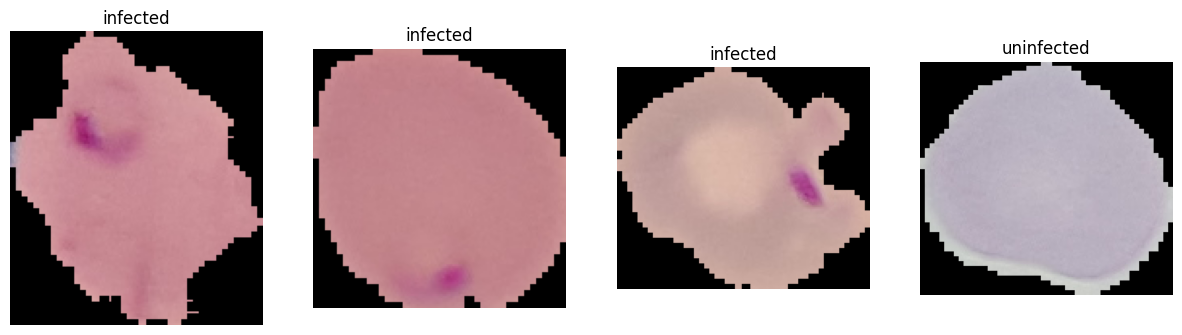

In [4]:
## Qualitative analysis and visualization

plt.figure()
fig, axes = plt.subplots(1, 4, figsize=(15,15))
ax1 = axes[0]
ax1.imshow(sample_images_positive[0], cmap='Greys_r')
ax1.set_title('infected')
ax1.axis('off')
ax2 = axes[1]
ax2.imshow(sample_images_positive[5], cmap='Greys_r')
ax2.set_title('infected')
ax2.axis('off')
ax3 = axes[2]
ax3.imshow(sample_images_positive[9], cmap='Greys_r')
ax3.set_title('infected')
ax3.axis('off')
ax4 = axes[3]
ax4.imshow(sample_images_negative[0], cmap='Greys_r')
ax4.set_title('uninfected')
ax4.axis('off');


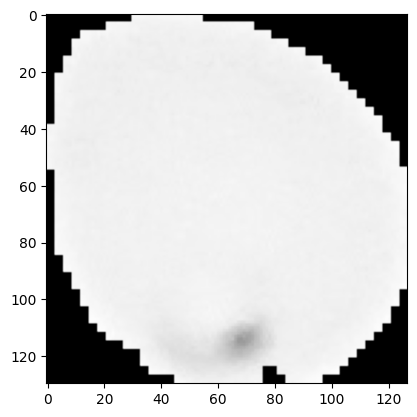

In [5]:
image_grayscale = color.rgb2gray(sample_images_positive[5])
plt.imshow(image_grayscale, cmap='Greys_r')

In [6]:
def padding(image, size):
    desired_size = size
    old_size = image.size
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # Replace Image.ANTIALIAS with Image.Resampling.LANCZOS
    im = image.resize(new_size, Image.Resampling.LANCZOS)
    new_im = Image.new('RGB',(desired_size, desired_size))
    new_im.paste(image, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
    return new_im

In [7]:
def brighten(image):
    max_ = np.max(image)
    image[image==0.0] = max_
    return image

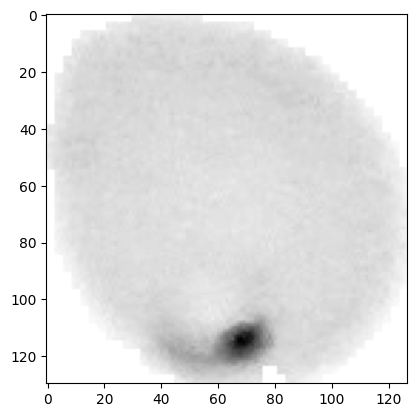

In [8]:
img = sample_images_positive[5]
img = np.array(img)
img = color.rgb2gray(img)
img = brighten(img)
plt.imshow(img, cmap='Greys_r');

In [9]:
X_positive_bright = []
for filename in listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'):
    if 'Thumbs.db' not in filename:
        img = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/' + filename)
        img = padding(img, 220)
        img = np.array(img)
        img = color.rgb2gray(img)
        img = brighten(img.reshape(220*220))
        img = transform.resize(img.reshape(220,220), (100,100))
        X_positive_bright.append(img)
X_positive_bright = np.array(X_positive_bright)

In [10]:
X_negative_bright = []
for filename in listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'):
    if 'Thumbs.db' not in filename:
        img = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/' + filename)
        img = padding(img, 220)
        img = np.array(img)
        img = color.rgb2gray(img)
        img = brighten(img.reshape(220*220))
        img = transform.resize(img.reshape(220,220), (100,100))
        X_negative_bright.append(img)
X_negative_bright = np.array(X_negative_bright)

In [11]:
X_positive_bright = X_positive_bright.reshape(13779, 100*100)
X_negative_bright = X_negative_bright.reshape(13779, 100*100)
print(X_positive_bright[0].shape)
print(X_negative_bright[0].shape)

(10000,)
(10000,)


In [12]:
X_positive_bright.min(), X_positive_bright.max(), X_negative_bright.min(), X_negative_bright.max()

(0.08069954011243408,
 0.9148203921568627,
 0.05867339546138914,
 0.9469815686274506)

In [13]:
from sklearn.decomposition import PCA
X_full = np.row_stack((X_positive_bright, X_negative_bright))
pca_full_variance = PCA(n_components = 0.95)
pca_full_variance.fit(X_full)
pca_full_variance.components_.shape

(96, 10000)

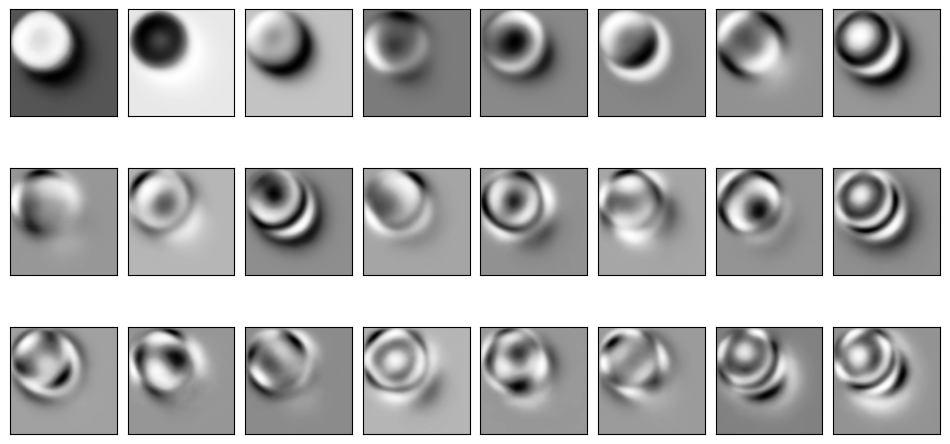

In [14]:
fig, axes = plt.subplots(3, 8, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_full_variance.components_[i].reshape(100, 100), cmap='Greys_r')

In [15]:
X_reduced = pca_full_variance.transform(X_full)
X_reduced.shape

(27558, 96)

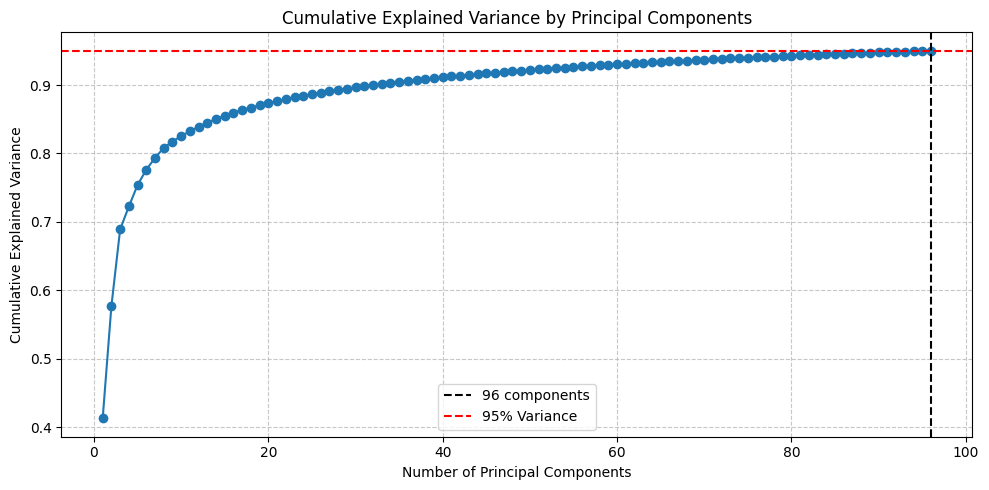

Number of components explaining 95% variance: 96


In [16]:
# Calculate the cumulative explained variance
var_cumu = np.cumsum(pca_full_variance.explained_variance_ratio_)

# Create the plot
plt.figure(figsize=[10, 5])
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Plot the cumulative explained variance
plt.plot(range(1, len(var_cumu) + 1), var_cumu, marker='o')

# Find the number of components that explain 95% variance
k = np.argmax(var_cumu >= 0.95) + 1

# Add vertical and horizontal lines
plt.axvline(x=k, color="k", linestyle="--", label=f'{k} components')
plt.axhline(y=0.95, color="r", linestyle="--", label='95% Variance')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the number of components explaining 95% variance
print(f"Number of components explaining 95% variance: {k}")

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [17]:
y_positive = np.ones(X_positive_bright.shape[0])
y_negative = np.zeros(X_negative_bright.shape[0])
y = np.hstack((y_positive, y_negative))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, stratify=y, train_size=0.5)

In [19]:
# Modified SVC model with probability=True
from sklearn.svm import SVC
model_svc = SVC(C=1000, gamma='scale', probability=True) #changed this
model_svc.fit(X_train, y_train)

# Save the trained model and PCA
import joblib

def save_models():
    joblib.dump(model_svc, 'malaria_svc_model.joblib')
    joblib.dump(pca_full_variance, 'malaria_pca.joblib')

save_models()

In [20]:
pred = model_svc.predict(X_test)

In [21]:
accuracy_score(y_test, pred)

0.8558676246462007

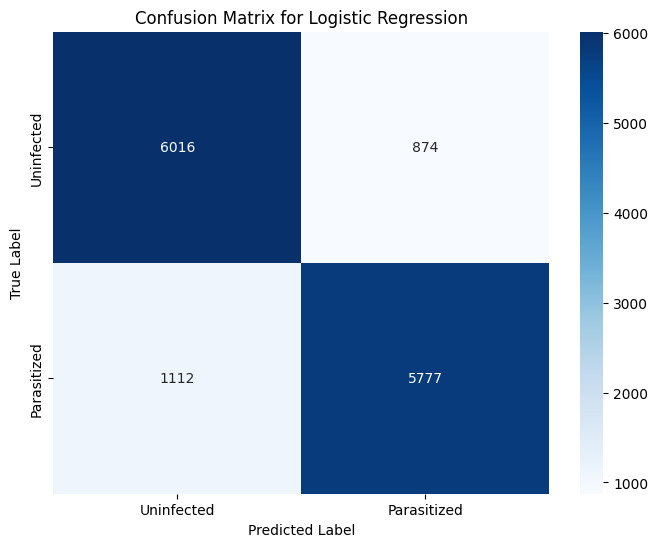

In [25]:
# Import required libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Uninfected", "Parasitized"], yticklabels=["Uninfected", "Parasitized"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Accuracy: 0.6747
Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.66      0.73      0.69      6890
 Parasitized       0.69      0.62      0.66      6889

    accuracy                           0.67     13779
   macro avg       0.68      0.67      0.67     13779
weighted avg       0.68      0.67      0.67     13779



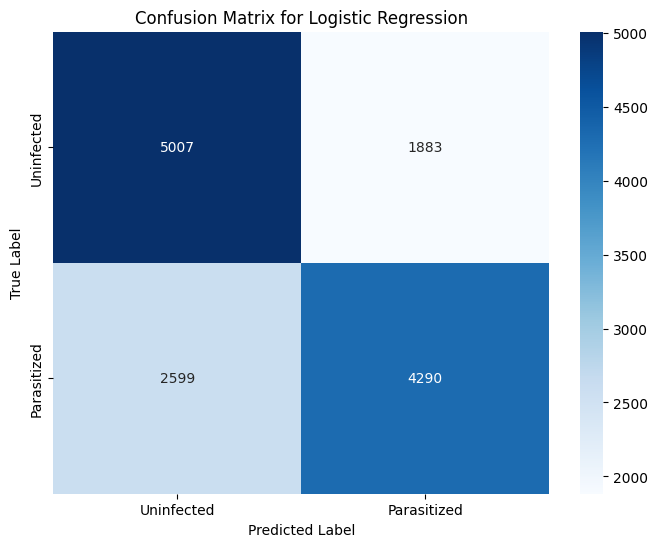

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Uninfected", "Parasitized"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Uninfected", "Parasitized"], yticklabels=["Uninfected", "Parasitized"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [28]:
# Save the logistic regression model
joblib.dump(log_reg_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

===================================================================================================================

***Summary:***

Images of infected cells display darker spots in various colors. These spots can vary in shape, size, and shade. The shape of the spots does not seem very important. The biggest difference in brightness in the images is at the edges where the samples meet the black background. This might create a challenge for the algorithm.